In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time
import datetime
from openpyxl import load_workbook
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline

In [2]:
path = 'Data Analyst - Case Study Datasets.xlsx'

In [3]:
start_time = time.time()

df_mov = pd.read_excel(path, sheet_name='Stock Movement')
df_inb = pd.read_excel(path, sheet_name='Inbound')
df_out = pd.read_excel(path, sheet_name='Outbound')
df_item = pd.read_excel(path, sheet_name='Items')
df_wh = pd.read_excel(path, sheet_name='Warehouse')
df_cour = pd.read_excel(path, sheet_name='Courier')
df_cust = pd.read_excel(path, sheet_name='Customer')

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 261.361243724823


In [4]:
# Rerun this cell to reset the dataframes
mov = df_mov.copy()
inb = df_inb.copy()
out = df_out.copy()
item = df_item.copy()
wh = df_wh.copy()
cour = df_cour.copy()
cust = df_cust.copy()

In [5]:
mov

,id,trans_id,qty,trans_date
0,1,INB00359486,40,2020-10-22 14:20:00
1,2,OUT00000412,1,2020-10-24 11:46:00
2,3,OUT00003133,1,2020-10-26 14:04:00
3,4,OUT00001393,1,2020-10-28 14:20:00
4,5,INB00360130,7,2020-10-28 14:58:00
...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00
92637,100571,INB00362586,2,2020-11-27 17:35:00
92638,100572,OUT00038471,1,2020-12-21 10:12:00
92639,100573,OUT00042731,1,2020-12-30 10:59:00


In [6]:
mov['qty'][mov['trans_date'].dt.year==2020].sum()

438047

In [7]:
# path_out = 'data_modified.xlsx'

In [8]:
# book = load_workbook(path_out)
# writer = pd.ExcelWriter(path_out, engine = 'openpyxl')
# writer.book = book

In [9]:
# mov.to_excel(writer, sheet_name='Stock Movement', index=False)
# writer.save()
# writer.close()

In [10]:
inb['tenant_code'].value_counts()

XYZ    5211
Name: tenant_code, dtype: int64

In [11]:
inb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   out                5211 non-null   object        
 1   warehouse_code     5211 non-null   object        
 2   tenant_code        5211 non-null   object        
 3   po                 5211 non-null   object        
 4   sku                5211 non-null   int64         
 5   received_qty       5211 non-null   int64         
 6   expected_qty       5211 non-null   int64         
 7   doc_received_time  5211 non-null   datetime64[ns]
 8   recieved_time      5211 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 366.5+ KB


In [12]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87430 entries, 0 to 87429
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              87430 non-null  object        
 1   warehouse_code  87430 non-null  object        
 2   tenant_code     87430 non-null  object        
 3   consignee_id    87430 non-null  object        
 4   awb             87430 non-null  object        
 5   status          87430 non-null  object        
 6   courier         87430 non-null  int64         
 7   sku             87430 non-null  int64         
 8   invoice_qty     87430 non-null  int64         
 9   pgi_qty         87430 non-null  int64         
 10  deliv_doc_time  87430 non-null  datetime64[ns]
 11  delivered_time  87430 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(6)
memory usage: 8.0+ MB


In [13]:
len(mov)

92641

In [14]:
mov['trans_id'].nunique()

92641

In [15]:
len(inb) + len(out)

92641

In [16]:
inb['sku'].nunique()

1530

In [17]:
out['sku'].nunique()

1050

In [18]:
mov['trans_id'][mov['trans_id'].str.contains('INB')].nunique()

5211

In [19]:
mov['trans_id'][mov['trans_id'].str.contains('OUT')].nunique()

87430

In [20]:
item['sku'].nunique()

1546

In [21]:
len(item)

1546

In [22]:
inb['sku'].nunique()

1530

In [23]:
len(inb['sku'])

5211

In [24]:
cust['id'].nunique()

77401

In [25]:
out['consignee_id'].nunique()

73717

### Adding a new column in Stock Movement

In [26]:
mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92641 entries, 0 to 92640
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          92641 non-null  int64         
 1   trans_id    92641 non-null  object        
 2   qty         92641 non-null  int64         
 3   trans_date  92641 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.8+ MB


In [27]:
mov[mov['trans_id'].str.contains('INB')]

,id,trans_id,qty,trans_date
0,1,INB00359486,40,2020-10-22 14:20:00
4,5,INB00360130,7,2020-10-28 14:58:00
5,6,INB00360264,36,2020-10-29 11:49:00
6,7,INB00360658,92,2020-10-30 17:21:00
9,10,INB00361217,21,2020-11-03 15:21:00
...,...,...,...,...
92580,100510,INB00362951,1,2020-12-07 22:13:00
92594,100524,INB00363479,1,2021-01-06 10:10:00
92633,100566,INB00359806,237,2020-10-26 22:23:00
92634,100567,INB00360731,559,2020-10-31 11:33:00


In [28]:
mov['trans_id'][mov['trans_id'].str.contains('OUT')]

1        OUT00000412
2        OUT00003133
3        OUT00001393
7        OUT00003860
8        OUT00007999
            ...     
92635    OUT00359560
92636    OUT00021496
92638    OUT00038471
92639    OUT00042731
92640    OUT00054254
Name: trans_id, Length: 87430, dtype: object

In [29]:
len(mov[mov['trans_id'].str.contains('INB')])

5211

In [30]:
len(mov[mov['trans_id'].str.contains('OUT')])

87430

In [31]:
mov['trans_cat'] = ''

In [32]:
mov['trans_cat'][mov['trans_id'].str.contains('INB')] = 'Inbound'
mov['trans_cat'][mov['trans_id'].str.contains('OUT')] = 'Outbound'

In [33]:
mov.sample(20)

,id,trans_id,qty,trans_date,trans_cat
86352,93761,OUT00008885,1,2020-11-11 12:44:00,Outbound
13096,14444,OUT00054666,1,2021-01-18 10:44:00,Outbound
61839,67484,OUT00046842,1,2021-01-06 10:51:00,Outbound
63407,69188,OUT00001761,1,2020-10-30 09:12:00,Outbound
61509,67146,OUT00022133,1,2020-11-23 11:48:00,Outbound
66367,72262,OUT00048771,1,2021-01-14 11:34:00,Outbound
48105,52648,OUT00044548,1,2021-01-09 11:13:00,Outbound
86123,93500,OUT00070549,1,2021-02-13 11:02:00,Outbound
35341,38654,OUT00083271,1,2021-02-26 11:17:00,Outbound
51573,56400,OUT00005184,2,2020-10-30 09:21:00,Outbound


In [34]:
mov['trans_cat'].value_counts()

Outbound    87430
Inbound      5211
Name: trans_cat, dtype: int64

In [106]:
# book = load_workbook('Data Analyst - Case Study Datasets (modified).xlsx')
# writer = pd.ExcelWriter('Data Analyst - Case Study Datasets (modified).xlsx', engine = 'openpyxl')
# writer.book = book

In [ ]:
# mov.to_excel(writer, sheet_name='Stock Movement', index=False)
# writer.save()
# writer.close()

## Items table EDA

In [36]:
item

,sku,name,brand,categories,primaryCategories,price
0,2020000001,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...,Sanus,"Audio & Video Accessories,TV Mounts,TV Accesso...",Electronics,1049900.0
1,2020000002,Boytone - 2500W 2.1-Ch. Home Theater System - ...,Boytone,"Stereos,Portable Bluetooth Speakers,TV, Video ...",Electronics,690000.0
2,2020000003,DENAQ - AC Adapter for TOSHIBA SATELLITE 1700 ...,DENAQ,"Computers,Office,Computer Accessories,Computer...",Electronics,239900.0
3,2020000004,DreamWave - Tremor Portable Bluetooth Speaker ...,DreamWave,"Portable Bluetooth Speakers,Bluetooth & Wirele...",Electronics,2909900.0
4,2020000005,NS-SP1800BL 5.1-Channel Home Theater System (B...,Yamaha,"Surround Speakers,Electronics Features,Surroun...",Electronics,2440100.0
...,...,...,...,...,...,...
1541,2020001542,BOYO - Concealed Mount License Plate Camera wi...,BOYO,"Auto & Tires,Auto Electronics,Backup Cameras,E...",Electronics,372600.0
1542,2020001543,Master and Dynamic MH40S2 Award Winning Over-ear,Master Dynamic,"Headphones,Over-Ear and On-Ear Headphones,Elec...",Electronics,3252400.0
1543,2020001544,Acer Predator G1-710 Desktop Computer - Intel ...,Acer,"Electronics,Computers,Desktop Computers,Deskto...",Electronics,19454400.0
1544,2020001545,House of Marley,House Of Marley,"Headphones,Bluetooth Headphones,All Headphones...",Electronics,592500.0


In [111]:
item.shape

(1546, 6)

In [38]:
item['categories'].nunique()

782

In [39]:
item['name'].nunique()

799

In [40]:
item['brand'].nunique()

257

In [41]:
item['brand'].value_counts().head()

Sony        103
Samsung      92
Yamaha       69
Apple        37
Logitech     34
Name: brand, dtype: int64

In [42]:
item['primaryCategories'].str.replace(' ','').value_counts()

Electronics              1538
IntelCeleron                2
AppleCarPlay                2
SiriEyesFree                2
Electronics,Furniture       2
Name: primaryCategories, dtype: int64

In [43]:
from wordcloud import WordCloud, STOPWORDS

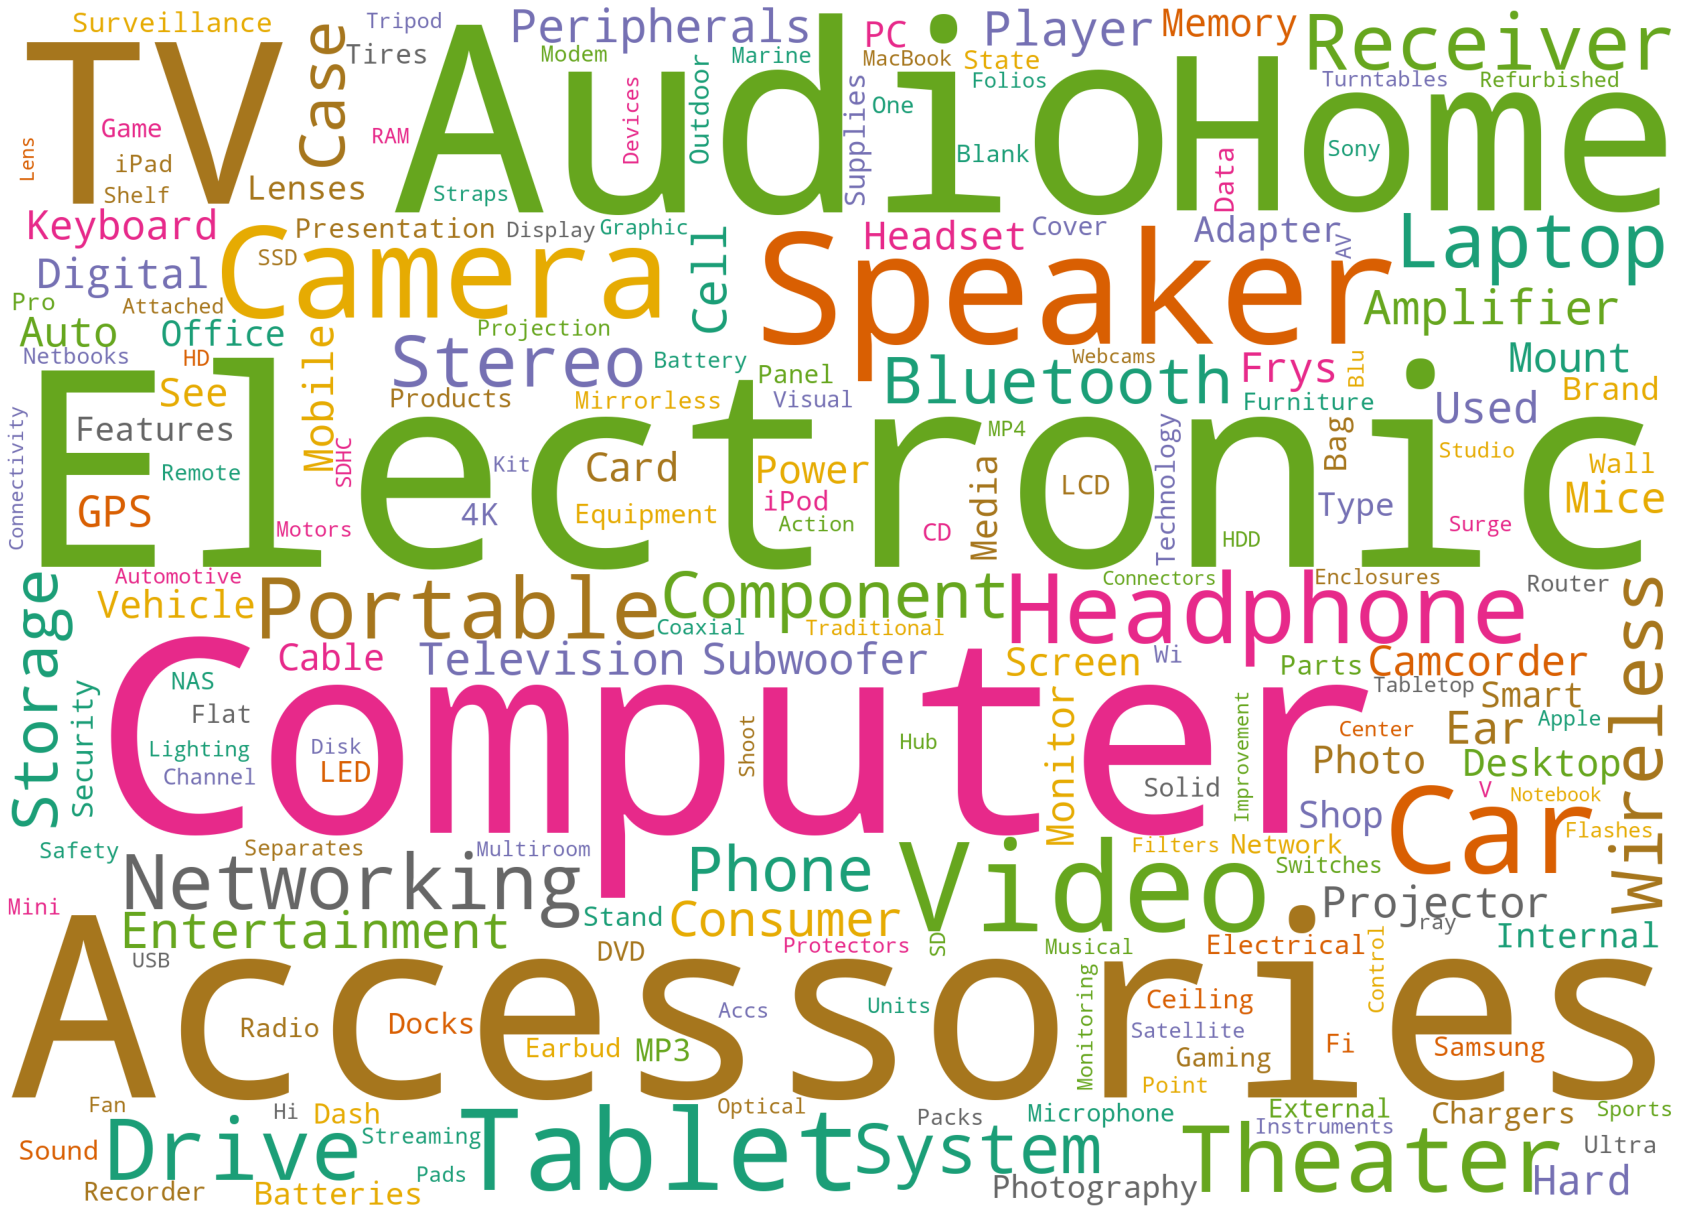

In [44]:
plt.figure(figsize=(30,25))
subset = item[item['primaryCategories']=='Electronics']
text = subset.categories.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='white', colormap="Dark2", collocations=False, width=2500, height=1800
                 ).generate(" ".join(text))
plt.axis('off')
plt.imshow(cloud)

## More EDA

In [45]:
inb['tenant_code'].value_counts()

XYZ    5211
Name: tenant_code, dtype: int64

In [46]:
inb.shape

(5211, 9)

In [47]:
mov

,id,trans_id,qty,trans_date,trans_cat
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound
...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound


In [48]:
str1 = 'INB00359486'
str2 = 'OUT00021496'

In [49]:
inb[inb['out'].str.contains(str1)]

,out,warehouse_code,tenant_code,po,sku,received_qty,expected_qty,doc_received_time,recieved_time
866,INB00359486,WH3,XYZ,STRJ2000118,2020000541,40,40,2020-10-22 14:20:00,2020-10-22 15:46:00


In [50]:
out[out['id'].str.contains(str2)]

,id,warehouse_code,tenant_code,consignee_id,awb,status,courier,sku,invoice_qty,pgi_qty,deliv_doc_time,delivered_time
19882,OUT00021496,WH3,XYZ,CUST0017990,STRJOBD2016819,Delivered,2,2020000754,1,2,2020-11-20 11:12:00,2020-11-20 19:56:00


## Adding more columns to Stock Movement

In [51]:
mov2 = mov.copy()
inb2 = inb.copy()

In [52]:
mov2['warehouse_code'] = ''

In [53]:
mov2

,id,trans_id,qty,trans_date,trans_cat,warehouse_code
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound,
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound,
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound,
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound,
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound,
...,...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound,
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound,


In [54]:
inb_lst = mov2['trans_id'][mov2['trans_id'].str.contains('INB')]

In [55]:
i = 'INB00321007'

In [56]:
inb2['warehouse_code'][inb2['out']==i]

0    WH2
Name: warehouse_code, dtype: object

In [57]:
inb2['warehouse_code'][inb2['out']==i].values

array(['WH2'], dtype=object)

In [58]:
i in mov2['trans_id'].values

True

In [59]:
mov2['trans_id'][mov2['trans_id']==i]

82942    INB00321007
Name: trans_id, dtype: object

In [60]:
if i in mov2['trans_id'].values:
    mov2['warehouse_code'][mov2['trans_id']==i] = inb2['warehouse_code'][inb2['out']==i].values

In [61]:
mov2['warehouse_code'].values

array(['', '', '', ..., '', '', ''], dtype=object)

In [62]:
mov2['warehouse_code'][mov2['trans_id']==i]

82942    WH2
Name: warehouse_code, dtype: object

In [63]:
inb2['warehouse_code'][inb2['out']==i].values

array(['WH2'], dtype=object)

In [64]:
mov2['warehouse_code'].value_counts()

       92640
WH2        1
Name: warehouse_code, dtype: int64

In [65]:
mov2[mov2['warehouse_code']=='WH2']

,id,trans_id,qty,trans_date,trans_cat,warehouse_code
82942,90080,INB00321007,6,2020-12-10 15:05:00,Inbound,WH2


In [66]:
inb2[inb2['out']=='INB00321007']

,out,warehouse_code,tenant_code,po,sku,received_qty,expected_qty,doc_received_time,recieved_time
0,INB00321007,WH2,XYZ,MPO52002389,2020000001,6,6,2020-12-10 15:05:00,2020-12-10 08:05:00


...................

In [67]:
mov2['warehouse_code'] = ''

In [68]:
inb_lst = mov2['trans_id'][mov2['trans_id'].str.contains('INB')]

In [69]:
inb_lst2 = ['INB00359486', 'INB00321098']

In [70]:
inb_lst[:5]

0    INB00359486
4    INB00360130
5    INB00360264
6    INB00360658
9    INB00361217
Name: trans_id, dtype: object

In [71]:
for i in inb_lst2:
    if i in mov2['trans_id'].values:
        mov2['warehouse_code'][mov2['trans_id']==i] = inb2['warehouse_code'][inb2['out']==i].values

In [72]:
mov2['warehouse_code'].value_counts()

       92639
WH3        1
WH1        1
Name: warehouse_code, dtype: int64

In [73]:
inb2[inb2['out']=='INB00359486']

,out,warehouse_code,tenant_code,po,sku,received_qty,expected_qty,doc_received_time,recieved_time
866,INB00359486,WH3,XYZ,STRJ2000118,2020000541,40,40,2020-10-22 14:20:00,2020-10-22 15:46:00


In [74]:
inb2[inb2['out']=='INB00321098']

,out,warehouse_code,tenant_code,po,sku,received_qty,expected_qty,doc_received_time,recieved_time
4,INB00321098,WH1,XYZ,MPO52002480,2020000005,8,8,2020-12-12 20:38:00,2020-12-12 13:38:00


In [75]:
inb2[inb2['warehouse_code']=='WH1']

,out,warehouse_code,tenant_code,po,sku,received_qty,expected_qty,doc_received_time,recieved_time
4,INB00321098,WH1,XYZ,MPO52002480,2020000005,8,8,2020-12-12 20:38:00,2020-12-12 13:38:00
8,INB00321102,WH1,XYZ,MPO52002484,2020000008,1,1,2020-12-13 11:49:00,2020-12-13 04:49:00
9,INB00321103,WH1,XYZ,MPO52002485,2020000008,1,1,2020-12-13 12:00:00,2020-12-13 05:00:00
10,INB00321104,WH1,XYZ,MPO52002486,2020000008,1,1,2020-12-13 12:04:00,2020-12-13 05:04:00
11,INB00321105,WH1,XYZ,MPO52002487,2020000009,1,1,2020-12-13 12:29:00,2020-12-13 05:29:00
...,...,...,...,...,...,...,...,...,...
5201,INB00364304,WH1,XYZ,STRJ2100037,2020000018,1000,1000,2021-03-03 16:42:00,2021-03-04 00:30:00
5202,INB00364305,WH1,XYZ,STRJ2100037,2020000029,1000,1000,2021-03-03 16:42:00,2021-03-04 00:30:00
5203,INB00364306,WH1,XYZ,STRJ2100037,2020000155,500,500,2021-03-03 16:42:00,2021-03-04 00:30:00
5204,INB00364307,WH1,XYZ,STRJ2100037,2020000154,300,300,2021-03-03 16:42:00,2021-03-04 00:30:00


In [79]:
mov2['warehouse_code']

0        WH3
1           
2           
3           
4           
        ... 
92636       
92637       
92638       
92639       
92640       
Name: warehouse_code, Length: 92641, dtype: object

The real thing

In [85]:
mov['warehouse_code'] = ''
mov

,id,trans_id,qty,trans_date,trans_cat,warehouse_code
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound,
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound,
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound,
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound,
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound,
...,...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound,
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound,


In [94]:
inb_lst = mov['trans_id'][mov['trans_id'].str.contains('INB')]
out_lst = mov['trans_id'][mov['trans_id'].str.contains('OUT')]

In [91]:
start_time = time.time()

for i in inb_lst:
    if i in mov['trans_id'].values:
        mov['warehouse_code'][mov['trans_id']==i] = inb['warehouse_code'][inb['out']==i].values

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 99.05800747871399


In [92]:
mov

,id,trans_id,qty,trans_date,trans_cat,warehouse_code
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound,WH3
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound,
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound,
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound,
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound,WH3
...,...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound,WH3
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound,


In [95]:
start_time = time.time()

for i in out_lst:
    if i in mov['trans_id'].values:
        mov['warehouse_code'][mov['trans_id']==i] = out['warehouse_code'][out['id']==i].values

print('Time elapsed: {}'.format((time.time() - start_time)))

Time elapsed: 3128.336364030838


In [96]:
mov

,id,trans_id,qty,trans_date,trans_cat,warehouse_code
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound,WH3
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound,WH3
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound,WH3
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound,WH3
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound,WH3
...,...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,WH3
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound,WH3
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,WH3
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound,WH3


In [97]:
mov['warehouse_code'].value_counts()

WH1    32523
WH3    23385
WH4    18766
WH2    17967
Name: warehouse_code, dtype: int64

In [99]:
mov['warehouse_code'].value_counts().sum()

92641

In [101]:
len(inb) + len(out)

92641

In [103]:
mov['tenant_code'] = 'XYZ'

In [104]:
mov

,id,trans_id,qty,trans_date,trans_cat,warehouse_code,tenant_code
0,1,INB00359486,40,2020-10-22 14:20:00,Inbound,WH3,XYZ
1,2,OUT00000412,1,2020-10-24 11:46:00,Outbound,WH3,XYZ
2,3,OUT00003133,1,2020-10-26 14:04:00,Outbound,WH3,XYZ
3,4,OUT00001393,1,2020-10-28 14:20:00,Outbound,WH3,XYZ
4,5,INB00360130,7,2020-10-28 14:58:00,Inbound,WH3,XYZ
...,...,...,...,...,...,...,...
92636,100569,OUT00021496,2,2020-11-20 11:12:00,Outbound,WH3,XYZ
92637,100571,INB00362586,2,2020-11-27 17:35:00,Inbound,WH3,XYZ
92638,100572,OUT00038471,1,2020-12-21 10:12:00,Outbound,WH3,XYZ
92639,100573,OUT00042731,1,2020-12-30 10:59:00,Outbound,WH3,XYZ


In [105]:
mov.isna().sum()

id                0
trans_id          0
qty               0
trans_date        0
trans_cat         0
warehouse_code    0
tenant_code       0
dtype: int64

In [108]:
path_out = 'data_modified.xlsx'

In [109]:
book = load_workbook(path_out)
writer = pd.ExcelWriter(path_out, engine = 'openpyxl')
writer.book = book

In [110]:
mov.to_excel(writer, sheet_name='Stock Movement', index=False)
writer.save()
writer.close()